# Introduction
The liver is well-thought-out to be one of the central organs in any living body with fundamental functions such as
processing leftover products, generating enzymes, and eliminating exhausted tissues or cells. We can stay alive
merely a couple of days if our liver shuts down. Fortunately, the liver can continue its role even when up to 75% of it is contaminated or removed. This is due to its astonishing capability to produce new liver tissues from fine fettle liver cells that quiet exist. It shows a significant role in several bodily functions such as protein creation and blood clotting to glucose (sugar), cholesterol, and iron metabolism. It has a range of functions, comprising eliminating toxins from the body, and is crucial for survival. The harm of these functions can reason to momentous destruction to the body. Once the liver is diseased with a virus, injured by chemicals, or under attack from its immune system, the elementary hazard is similar; that is, the liver will become so spoiled that it can no lengthier retain an individual alive. According to World Health Organization (WHO) and World Gastroenterology
Organization (WGO), 35 million individuals pass away due to chronic diseases, and liver failure is one of the apprehensive diseases stated. It is further stated that more than 50 million grown-ups will be affected with
chronic liver disease (CLD), and it requests for instantaneous responsiveness for actions in a conference held in
Paris that deliberated the shocking drifts of liver disease worldwide. Moreover, agreeing to the current figures,
25 million US residents are pretentious by the liver or biliary ailment, and out of these, 50% populace have no symptoms.

# Dataset
This dataset contains 416 liver patient records and 167 non liver patient. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

## Features:
* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# Problem Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset is used to evaluate prediction algorithms in an effort to reduce burden on doctors.

##  Mapping Problem to Machine Learning

###  Type of Machine Learning Problem

It is a binary classification problem, where we need to predict if a given patient has liver disease or not

###  Evaluation Metric

Since this is binary classification problem, we use the following metrics:
* **Confusion matrix** - For getting a better clarity of the no of correct/incorrect predictions by the model
* **ROC-AUC** - It considers the rank of the output probabilities and intuitively measures the likelihood that model can distinguish between a positive point and a negative point. (**Note:** ROC-AUC is typically used for binary classification only). We will use AUC to select the best model.

# Loading Necessary Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

# Loading the dataset

In [2]:
df=pd.read_csv('liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

In [4]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

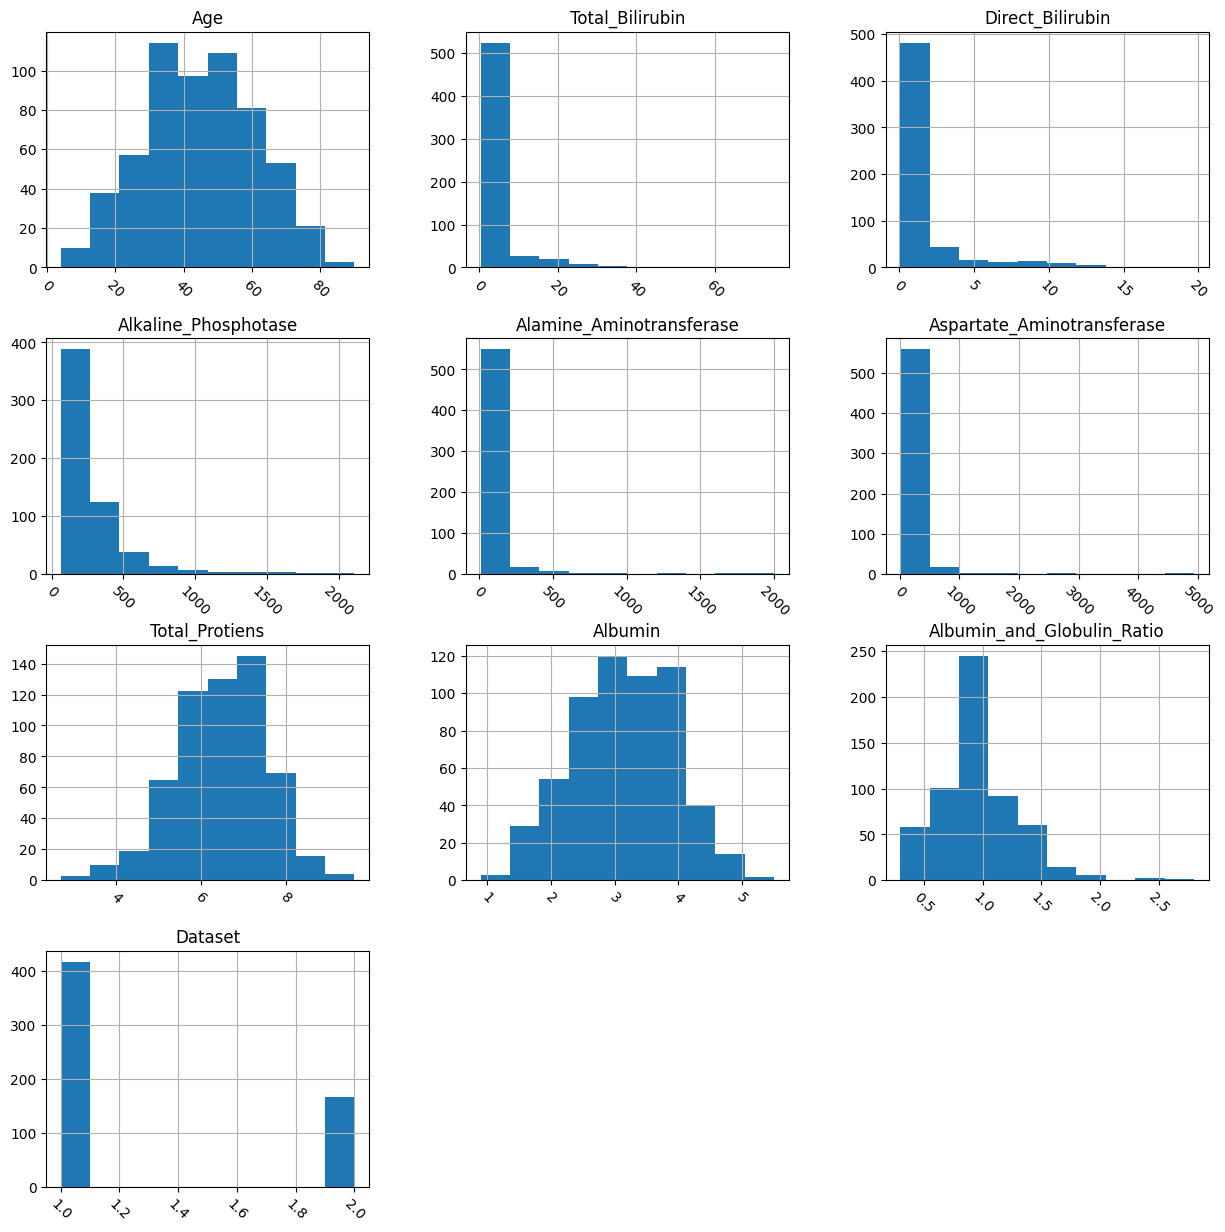

In [5]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.305660,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209187,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [7]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [8]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

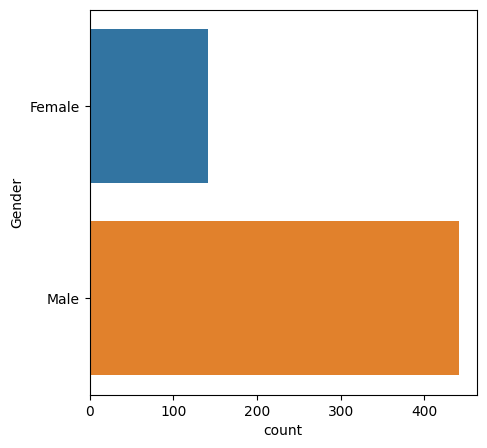

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [10]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


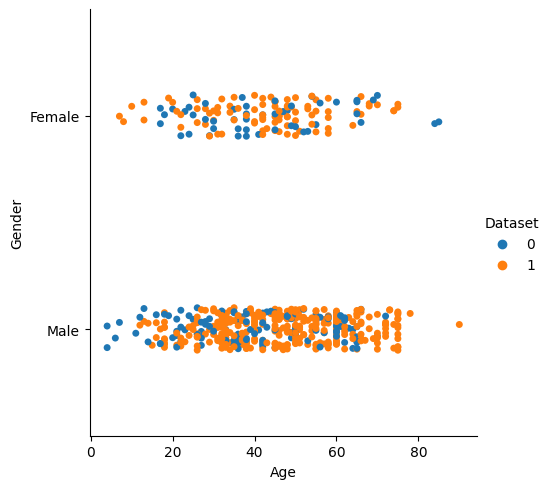

In [11]:
sns.catplot (x="Age", y="Gender", hue="Dataset", data=df);

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


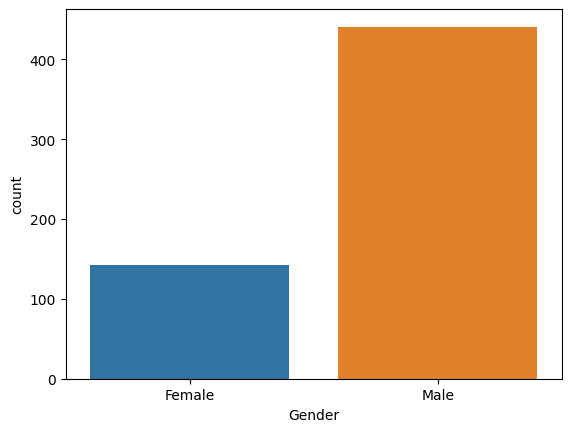

In [12]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [13]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

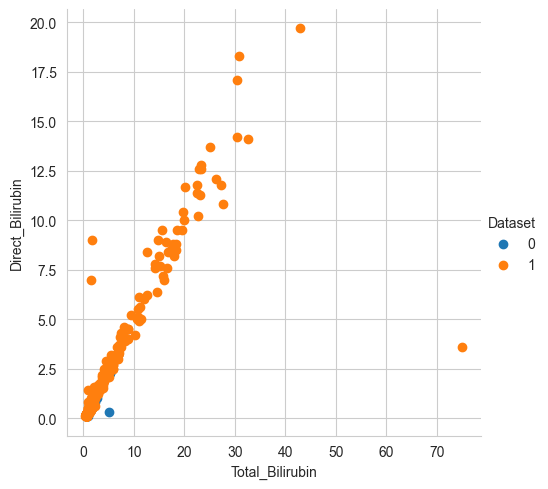

In [14]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

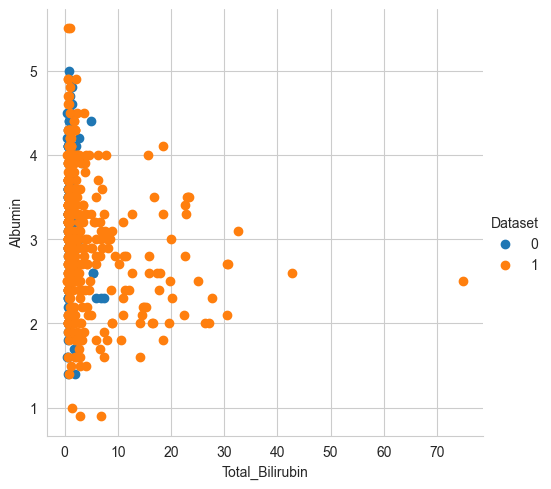

In [15]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

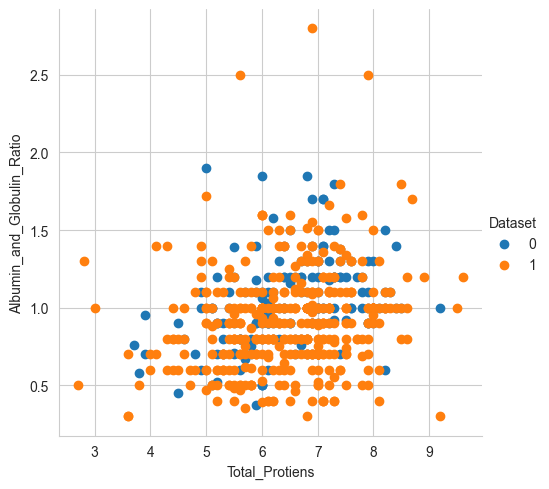

In [16]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [17]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011302,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089923,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011302,-0.089923,1.000000,0.874198,0.206340,0.213714,0.237515,-0.007267,-0.220512,-0.204356,0.218474
Direct_Bilirubin,0.007529,-0.100436,0.874198,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206340,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.213714,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237515,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.007267,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.220512,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.204356,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

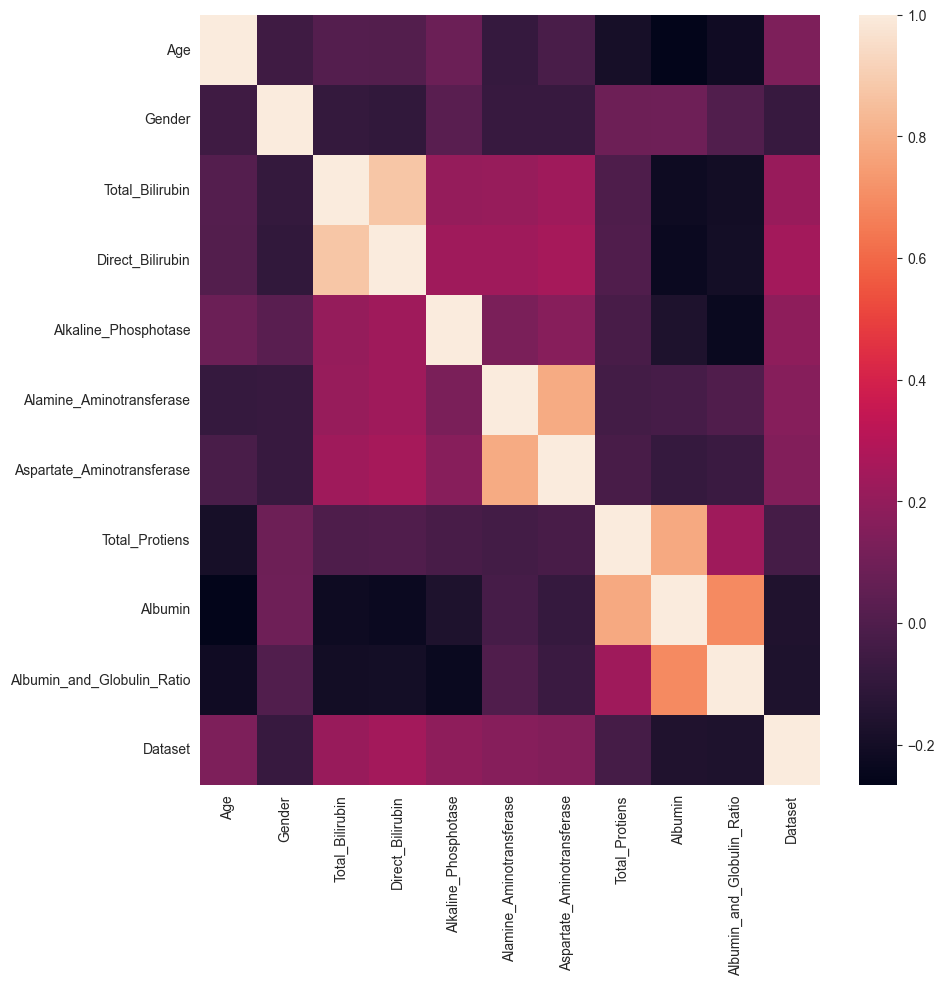

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

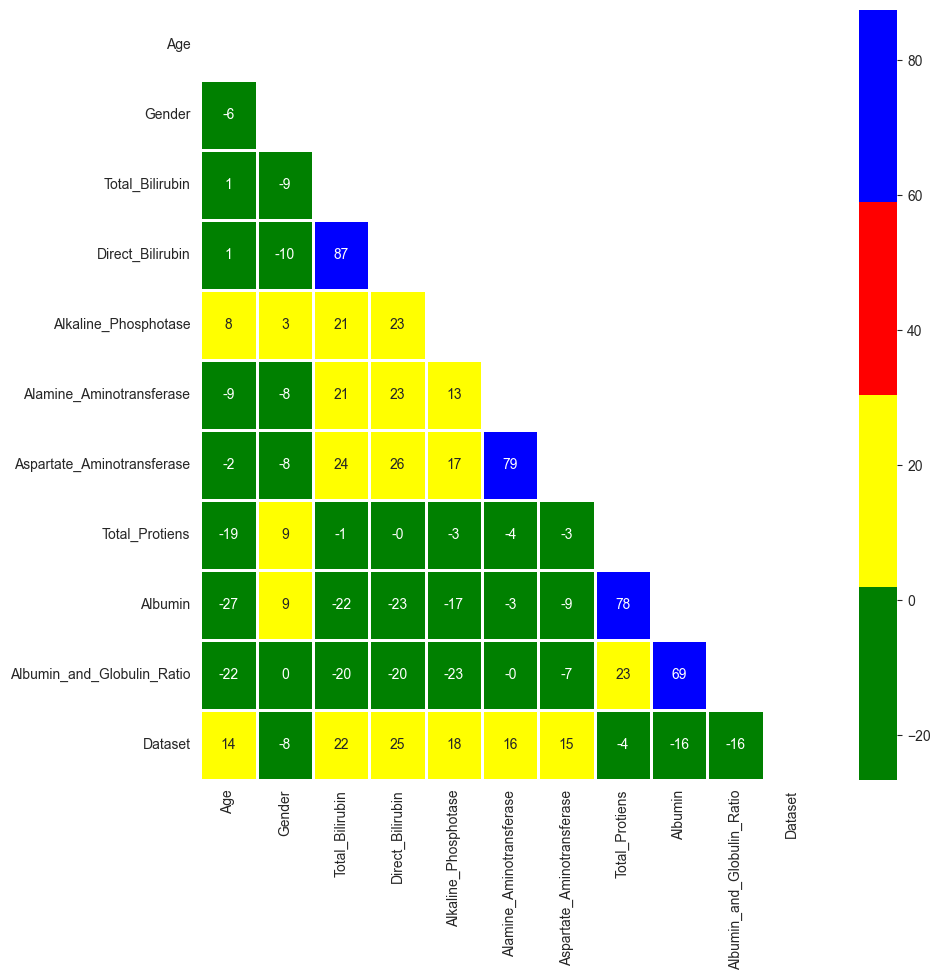

In [19]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [20]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


## Removing Outliers

<Axes: >

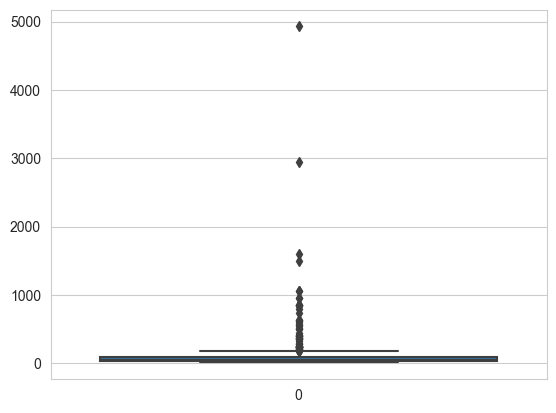

In [21]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [22]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [23]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: >

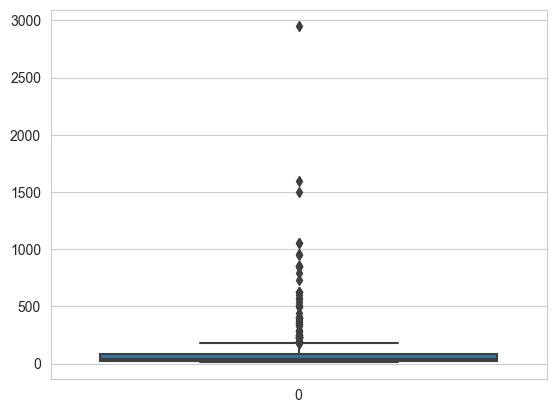

In [24]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [25]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [26]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [27]:
df.isnull().values.any()

True

In [28]:
df=df.dropna(how='any')  

## Machine Learning Models

### Data Preparation

In [29]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [30]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)



In [31]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [32]:
train_mean = X_train.mean()
train_std = X_train.std()

In [33]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [34]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.378547e-16,-8.271285e-17,3.938707e-18,1.772418e-17,6.301931e-17,-7.877414e-18,-2.363224e-17,1.486862e-15,1.417935e-16,-3.150966e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.459710e+00,-5.980292e-01,-4.627751e-01,-5.013974e-01,-9.009611e-01,-3.943772e-01,-4.865614e-01,-3.476087e+00,-2.818030e+00,-2.023543e+00
25%,-7.595886e-01,-5.980292e-01,-4.010215e-01,-4.658144e-01,-4.636908e-01,-3.157860e-01,-4.017376e-01,-6.503894e-01,-7.121980e-01,-6.338007e-01
50%,2.975347e-02,-5.980292e-01,-3.701448e-01,-4.302314e-01,-3.270438e-01,-2.432402e-01,-3.056039e-01,7.882282e-02,3.103678e-02,1.145223e-01
75%,7.583769e-01,1.668451e+00,-1.076922e-01,-7.440091e-02,2.042996e-02,-9.814860e-02,-7.092474e-02,6.257320e-01,8.362078e-01,4.199603e-01
max,2.762091e+00,1.668451e+00,1.105426e+01,6.472879e+00,7.090935e+00,9.701578e+00,8.504762e+00,2.813368e+00,2.880103e+00,5.612406e+00


In [35]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [36]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.216940,-0.063426,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.851421,0.835581,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.598029,-0.447337,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.598029,-0.401022,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.598029,-0.385583,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.598029,-0.200323,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,1.668451,4.230495,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


##  Model-1 Logistic Regression

In [37]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [38]:
model.best_estimator_

LogisticRegression(C=0.1)

In [39]:
## Predict Train set results
y_train_pred = model.predict(X_train)
## Predict Test set results
y_pred = model.predict(X_test)
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [40]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.62947524, 0.60622865, 0.65623608, 0.69588883, 0.45208858,
       0.97814709, 0.56667134, 0.67507453, 0.79336682, 0.5064037 ])

In [41]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.8180750446327016


In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred).T)

Confusion Matrix:
 [[ 1  4]
 [31 77]]


In [43]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

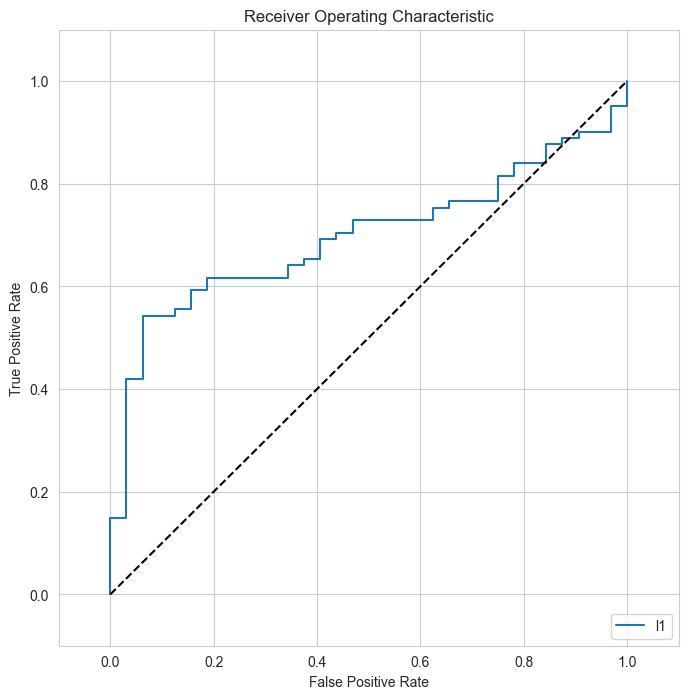

In [44]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
# Calculate AUC for Train set
print("AUC for Train set:", roc_auc_score(y_train, y_train_pred))

AUC for Train set: 0.5380781212556913


In [46]:
# Calculate AUC for Test set
print("AUC for Test set:",auc(fpr, tpr))

AUC for Test set: 0.6963734567901234


#### Feature Importance

In [47]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [48]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Direct_Bilirubin
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Alkaline_Phosphotase
Total_Bilirubin
Age
Gender
Albumin_and_Globulin_Ratio


## Model-2 Random Forest

In [49]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [50]:
model.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=400)

In [51]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]
# Display first 10 predictions
y_pred_proba[:10]

array([0.64954663, 0.65135119, 0.59796131, 0.56400595, 0.30624405,
       0.98535417, 0.50289087, 0.50552282, 0.96121131, 0.37239998])

In [52]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred).T)

Confusion Matrix:
 [[ 8 12]
 [24 69]]


In [53]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

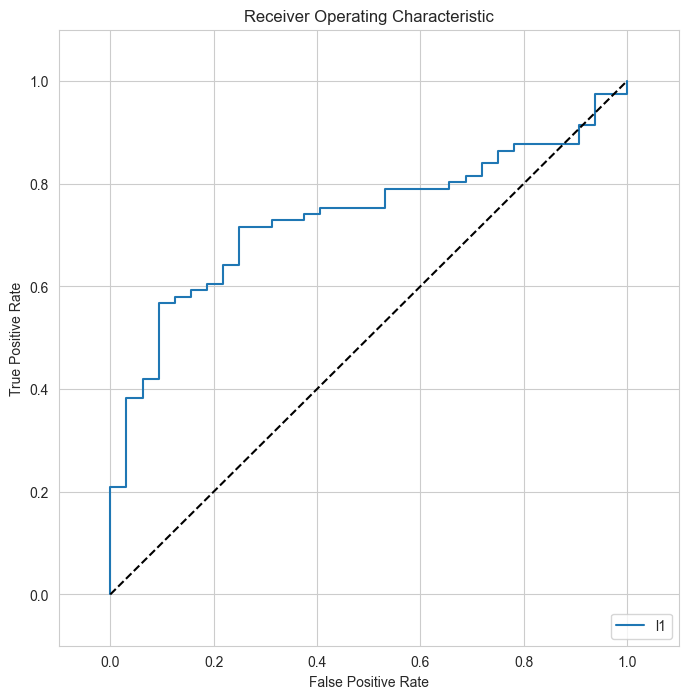

In [54]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
# Calculate AUC for Train set
print("AUC for Train set:", roc_auc_score(y_train, y_train_pred))


AUC for Train set: 0.9961538461538462


In [56]:
# Calculate AUC for Test set
print("AUC for Test set:",auc(fpr, tpr))

AUC for Test set: 0.7341820987654321


#### Feature Importance

In [57]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [58]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Aspartate_Aminotransferase
Total_Bilirubin
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin
Albumin_and_Globulin_Ratio
Total_Protiens
Gender


## Model-3 XGBoost

In [59]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='roc_auc')

In [60]:
model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]
# Display first 10 predictions
y_pred_proba[:10]

array([0.72551566, 0.48862875, 0.56667984, 0.5203783 , 0.46317714,
       0.90963453, 0.6243529 , 0.5113718 , 0.9030912 , 0.4968356 ],
      dtype=float32)

**Note:** Just as above we can use these probabilities to get model interpretation

In [62]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred).T)

Confusion Matrix:
 [[ 5 10]
 [27 71]]


In [63]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

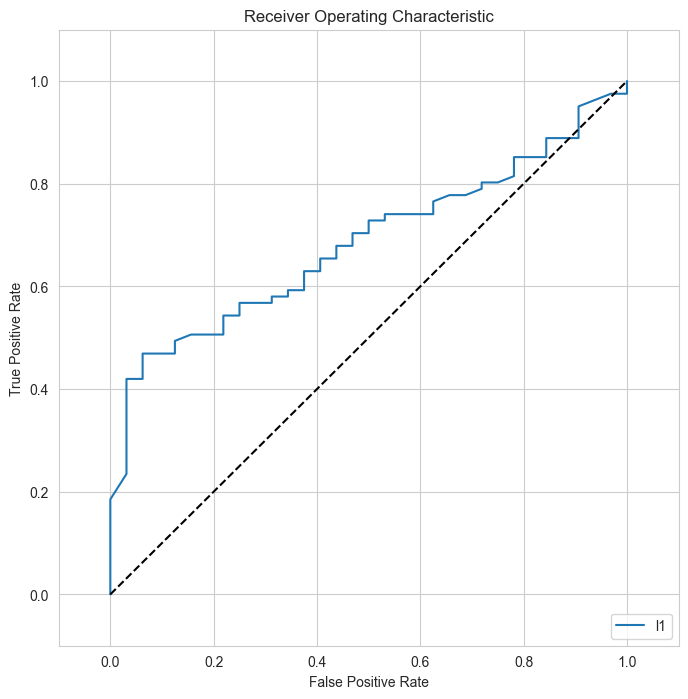

In [64]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
# Calculate AUC for Train
print("AUC for Train:",roc_auc_score(y_train, y_train_pred))

AUC for Train: 0.6410975317517373


In [66]:
# Calculate AUC for Test
print("AUC for Test: ",auc(fpr, tpr))

AUC for Test:  0.683641975308642


#### Feature Importance

In [67]:
model = XGBClassifier(max_depth=1,learning_rate=0.05,n_estimators=500, reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

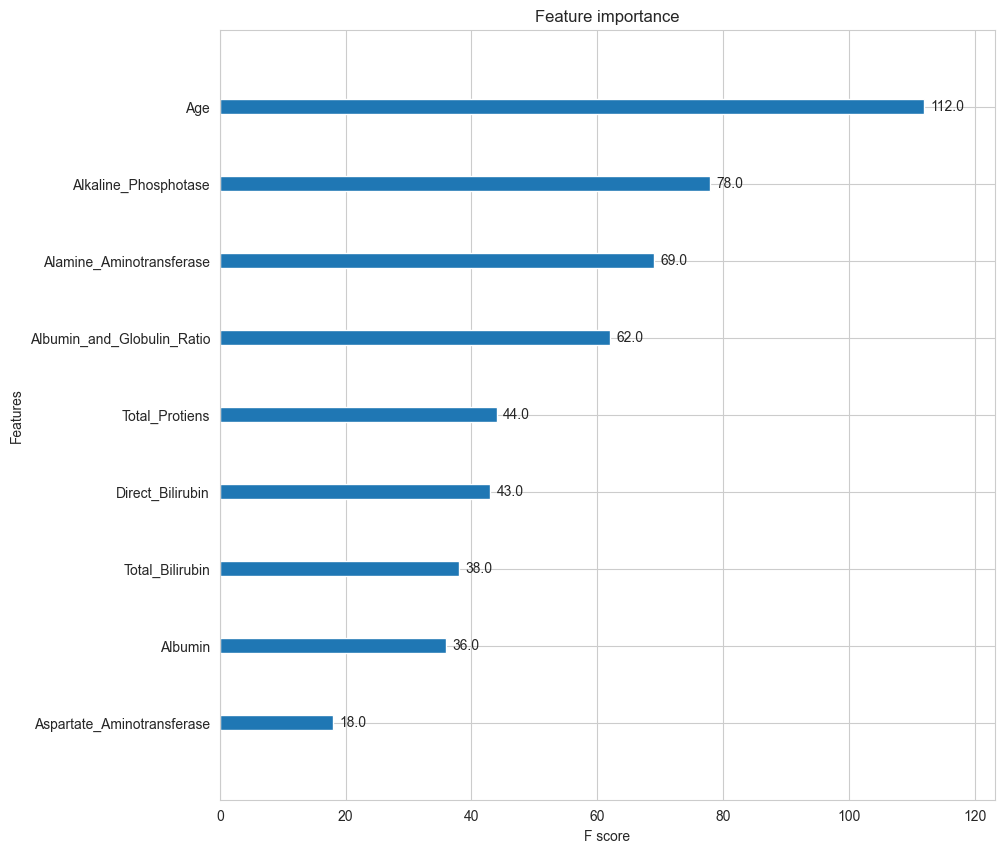

In [69]:
my_plot_importance(model, (10,10))

## Model-4 KNN

In [70]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 17.


In [71]:
MSE.index(min(MSE))

8

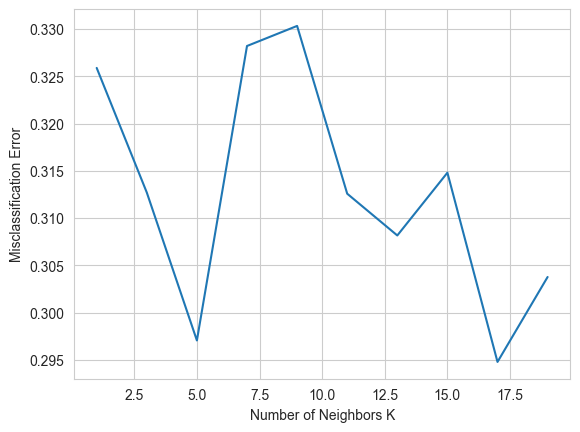

In [72]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [73]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [74]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

In [75]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
print("Accuracy: ",acc)

Accuracy:  69.91150442477876


In [76]:
cnf=confusion_matrix(y_test,y_pred).T
print("Confusion Matrix:\n",cnf)

Confusion Matrix:
 [[ 4  6]
 [28 75]]


In [77]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [78]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.76470588, 0.64705882, 0.94117647, 0.64705882, 0.41176471,
       1.        , 0.41176471, 0.52941176, 0.64705882, 0.52941176])

In [79]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

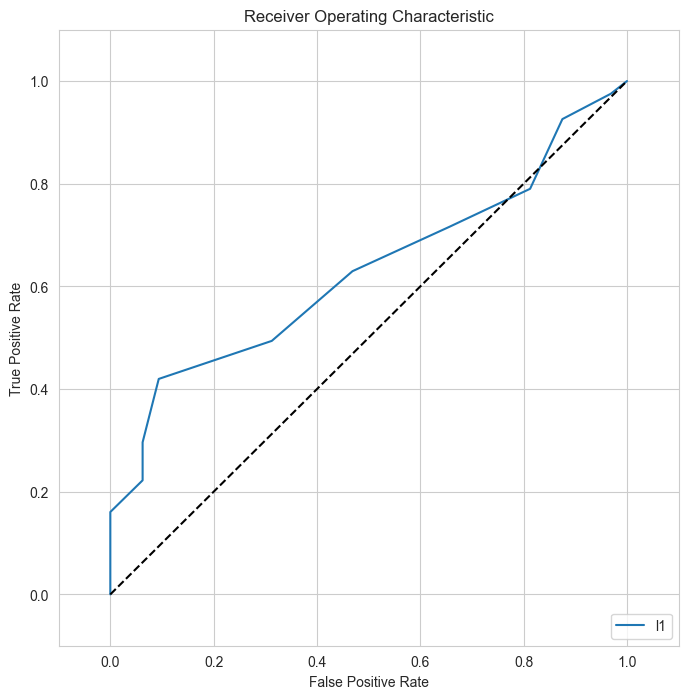

In [80]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
# Calculate AUC for Train
print("AUC for Train:", roc_auc_score(y_train, y_train_pred))

AUC for Train: 0.6300023963575365


In [82]:
# Calculate AUC for Test
print("AUC for Test:",auc(fpr, tpr))

AUC for Test: 0.6282793209876544


## Model-5 Descision Trees

In [83]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [84]:
model.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [85]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[:10]

array([0.75609756, 0.54193548, 0.54193548, 0.54193548, 0.        ,
       0.97540984, 0.75609756, 0.54193548, 0.97540984, 0.        ])

In [86]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred).T)

Confusion Matrix:
 [[ 1  5]
 [31 76]]


In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

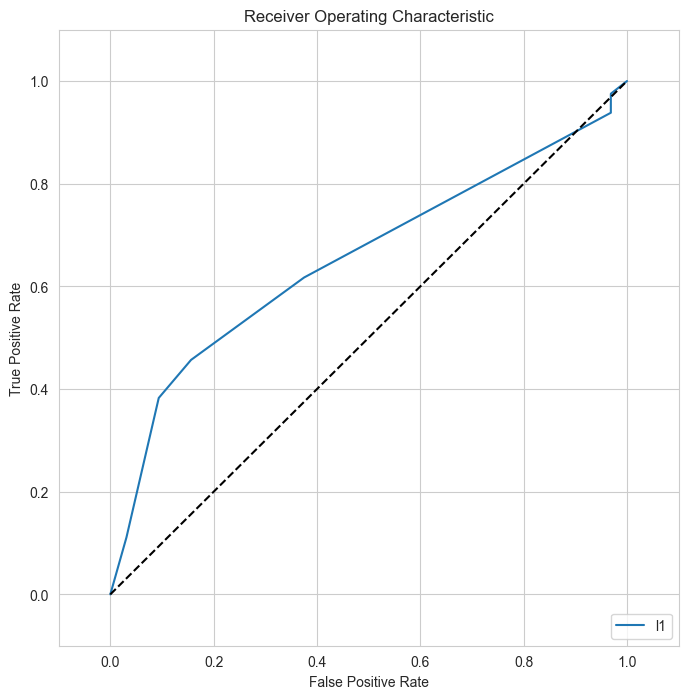

In [88]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
# Calculate AUC for Train
print("AUC for Train:", roc_auc_score(y_train, y_train_pred))

AUC for Train: 0.6029235561945843


In [90]:
print("Accuracy: ",(auc(fpr, tpr))*100)

Accuracy:  65.35493827160494


#### Feature Importance

In [91]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [92]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Albumin_and_Globulin_Ratio
Direct_Bilirubin
Albumin
Aspartate_Aminotransferase
Gender
Alamine_Aminotransferase
Total_Protiens


# How data can be prepared, refined and explored for further analysis

### Data Preparation and Refinement:

#### Handling Missing Values:

Address missing values in the dataset, particularly in the "Albumin_and_Globulin_Ratio" feature.
Options include imputing missing values with the mean, median, or other strategies, or removing rows or columns with missing data.

#### Data Types:

Ensure that data types are appropriate for each column. For example, check if numerical columns are represented as numeric types.

#### Categorical Variables:

If there are categorical variables, consider encoding them using techniques like one-hot encoding or label encoding, depending on the nature of the data.

#### Outlier Detection and Handling:

Identify and handle outliers in numerical features, as they can impact model performance.
Consider using visualizations like box plots or statistical methods to detect outliers.

#### Feature Scaling:

Depending on the machine learning algorithms you plan to use, consider scaling numerical features to a similar range. Standardization or normalization can be applied.

#### Feature Engineering:

Create new features that might provide additional insights or improve model performance. For example, you could derive features based on domain knowledge.

### Data Exploration:

#### Explore Correlations:

Revisit the correlation matrix to identify relationships between features. Consider visualizations like heatmaps for a more intuitive understanding.

#### Univariate and Bivariate Analysis:

Conduct detailed univariate and bivariate analysis to understand the distribution of individual features and relationships between pairs of features.

#### Target Variable Distribution:

Examine the distribution of the target variable ("Dataset" in your case) to understand the balance of classes.

#### Visualizations:

Create additional visualizations, such as histograms, pair plots, or violin plots, to gain deeper insights into the data distribution.

#### Statistical Tests:

If relevant, perform statistical tests to validate hypotheses or identify significant differences between groups.

# Critically analyse, evaluate and summarise findings from a mini-research project.

The dataset comprises 583 patient records with blood test results and demographics, primarily focusing on liver disease diagnosis. Exploratory data analysis revealed an imbalance in gender distribution, with 441 males and 142 females. Descriptive statistics provided insights into the numerical features, while visualizations highlighted relationships and distributions. Missing values in the "Albumin_and_Globulin_Ratio" feature were noted. Machine learning models, including Random Forest, exhibited moderate performance (AUC ≈ 0.67), and feature importance analysis underscored the significance of certain blood test results. Addressing missing values and potential feature engineering could further refine model accuracy.

# Reflect on both processes and outcomes of your project, including any missing steps or stages.

#### Dataset Overview:

The dataset contains information on patients, including age, gender, various blood test results, and a binary target variable indicating the presence or absence of liver disease (Dataset: 1 for liver disease, 2 for no liver disease).

#### Data Exploration:

There are 583 entries in the dataset.
The age of patients ranges from 4 to 90 years.
Gender distribution: 441 males and 142 females.

#### Descriptive Statistics:

Descriptive statistics provide insights into the central tendency and spread of numerical features.
Noteworthy statistics include means, standard deviations, and quartiles for various blood test results.

#### Data Visualization:

Plots and visualizations help understand the distribution and relationships within the data.
A count plot showed a significant imbalance in the gender distribution, with more males than females.
A correlation matrix highlighted relationships between different blood test results.

#### Missing Values:

The "Albumin_and_Globulin_Ratio" feature has missing values (579 non-null out of 583). This might need to be addressed through imputation or removal.

#### Model Training and Evaluation:

We applied several machine learning models, including Logistic Regression, Random Forest, XGBoost, K-Nearest Neighbors, and Decision Trees.
Model evaluation metrics, including confusion matrices and AUC, were provided for both train and test sets.
The Random Forest model performed well with an AUC of approximately 0.67 on the test set.

#### Feature Importance:

Feature importance was assessed for some models, revealing the significance of features such as "Direct_Bilirubin," "Alamine_Aminotransferase," and "Aspartate_Aminotransferase."

#### Model Optimization:

RandomizedSearchCV was employed for hyperparameter tuning in Random Forest and Decision Tree models.